/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/ilalucnikov/miniconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


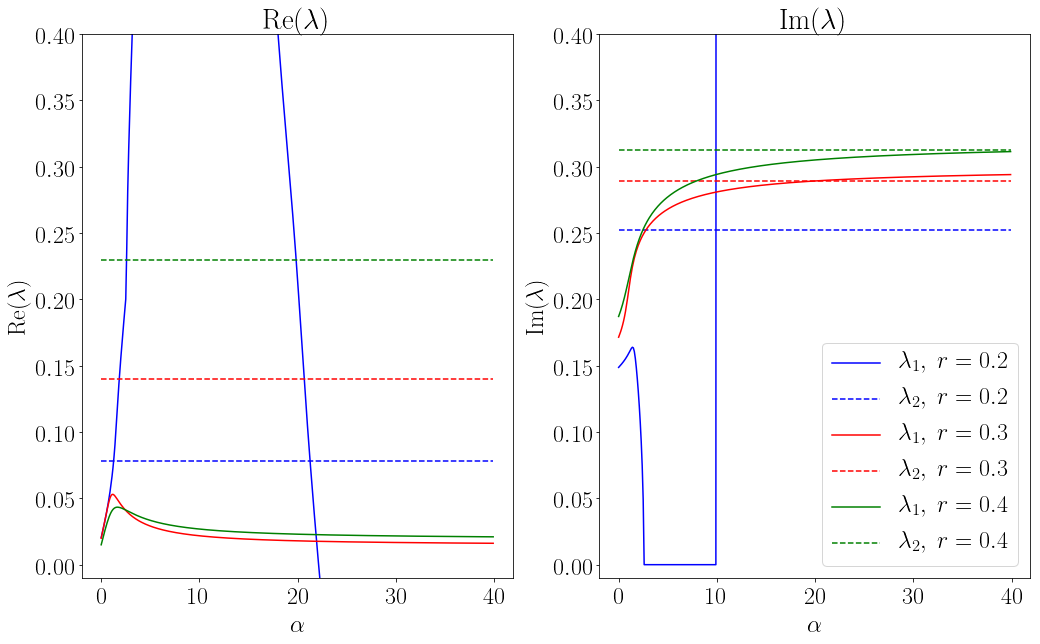

In [9]:
import mf_mdp as mm

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':24})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=24)
rc('ytick', labelsize=24)


###########
#parameters
###########
max_alpha = 40
dalpha = 0.1
n =30
q = 9
epsilon = 0.05
###########
###########
colors_arr = ['b', 'r', 'g']
fig = plt.figure()
fig.set_size_inches(17., 10.)
r = 0.2
dr = 0.1
for c in colors_arr:
    model = mm.mf_mdp_model(n = n, q = q, epsilon = epsilon, alpha = 4., r = r)
    re_lambdas, im_lambdas, x = model.relax_constant_tracking(max_alpha, dalpha)
    r = r + dr

    plt.subplot(1,2,1)
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'${\rm Re}(\lambda)$')
    plt.plot(x, re_lambdas[:,1], '-', color=c)
    plt.plot(x, re_lambdas[:,3], '--', color=c)
    plt.ylim(top = 0.4)
    plt.ylim(bottom = -0.01)
    plt.title(r'${\rm Re}(\lambda)$')
    
    plt.subplot(1,2,2)
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'${\rm Im}(\lambda)$')
    plt.ylim(top = 0.4)
    plt.ylim(bottom = -0.01)
    plt.plot(x, -im_lambdas[:,1], '-', color=c)
    plt.plot(x, -im_lambdas[:,3], '--', color=c)
    plt.title(r'${\rm Im}(\lambda)$')
    
    plt.legend((r'$\lambda_1,\ r=0.2$', r'$\lambda_2,\ r=0.2$',\
    r'$\lambda_1,\ r=0.3$', r'$\lambda_2,\ r=0.3$',\
    r'$\lambda_1,\ r=0.4$', r'$\lambda_2,\ r=0.4$'))
plt.savefig('Spectrum_vs_alpha.pdf')